In [1]:
#Handy imports from class

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal

# also imported time to track efficiency
import time

temp_df = pd.read_csv('archive/temperature.csv')

In [2]:
temp_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


### 1. Write a function that efficiently converts every column to a different temperature scale

In [3]:
# formula to convert Kelvin to Fahrenheit (0K − 273.15) × 9/5 + 32 = -459.7°F or (xK -273.15) * (9/5) + 32 = F
new_df = temp_df.copy()
cities = pd.Series(new_df.columns)
# convert cities to a dictionary for use in the function
cities.to_dict()

# function to convert Kelvin to Fahrenheit
def convert_temp(x):
    return (x-273.15)* 9/5 + 32

# function to loop through the dictionary and use df.apply to convert temp to all columns    
def now_Kelvin(df):
    for key, value in cities.items():
        if key == 0:
            continue
        df[value] = df.apply(lambda x: convert_temp(x[value]), axis =1)
    return df

# use time.perf_counter() to see how long it takes the function to run
tic = time.perf_counter()
now_Kelvin(new_df)
toc = time.perf_counter()
print(f"Ran now_Kelvin in {toc - tic:0.4f} seconds")

Ran now_Kelvin in 18.9871 seconds


In [4]:
new_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
1,2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2,2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
3,2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
4,2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63


### 2. Write a function that efficiently fills in missing values in every column, except for trailing NANs.  

That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end

In [5]:
interp_df = new_df.interpolate(axis=0, limit_area='inside')
interp_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
1,2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2,2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
3,2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
4,2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63


In [6]:
interp_df.loc[interp_df['Montreal'].isnull()]

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.71,NaN,NaN,NaN


In [7]:
# compares to the the original dataframe which still has null values in the middle
new_df.loc[new_df['Montreal'].isnull()]

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710,NaN,NaN,NaN
3859,2013-03-11 07:00:00,NaN,40.328,47.9264,39.32,NaN,47.600,50.366,NaN,29.1524,...,NaN,33.596,NaN,NaN,61.2884,61.961,62.807,61.4684,NaN,57.212
3860,2013-03-11 08:00:00,NaN,38.756,45.6908,38.27,NaN,47.144,49.346,NaN,24.4688,...,NaN,32.816,NaN,NaN,67.4468,64.922,69.224,62.7668,NaN,58.718


#### This is the code I had when I originally turned in the assignment where I used bfill

In [8]:
# this code works
#column_test = fahr_df['Vancouver'].fillna(axis=0, method = 'bfill')

filled_df = new_df.copy()
cities = pd.Series(filled_df.columns)
cities.to_dict()


# function for basic interpolation that pulls in the next hour's temperature rather than linear interpolation
# I tried to figure out how to incorporate np.interp into my function but I kept getting errors
def no_nan(df):
    for key, value in cities.items():
        if key == 0:
            continue
        # uses the next value in the column (value in the next row) to fill missing values
        df[value].fillna(axis=0, method = 'bfill', inplace=True)
    return df

tic = time.perf_counter()
no_nan(filled_df)
toc = time.perf_counter()
print(f"Ran no_nan in {toc - tic:0.4f} seconds")

Ran no_nan in 0.0267 seconds


In [9]:
# verify only trailing NaNs are left by looking at all the spots where NaN is still there
filled_df.loc[filled_df['Montreal'].isnull()]

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem


### 3. Find cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average

In [10]:
# create a month column
filled_df['Month'] = pd.DatetimeIndex(filled_df['datetime']).month
filled_df.tail()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,Month
45248,2017-11-29 20:00:00,NaN,47.930,NaN,45.806,68.720,66.200,61.502,70.808,54.626,...,NaN,35.564,58.874,NaN,NaN,NaN,NaN,NaN,NaN,11
45249,2017-11-29 21:00:00,NaN,49.532,NaN,47.300,72.554,67.262,63.428,72.392,55.940,...,NaN,33.764,55.166,NaN,NaN,NaN,NaN,NaN,NaN,11
45250,2017-11-29 22:00:00,NaN,50.432,NaN,49.280,73.058,66.974,64.742,73.580,55.922,...,NaN,32.594,51.422,NaN,NaN,NaN,NaN,NaN,NaN,11
45251,2017-11-29 23:00:00,NaN,49.766,NaN,49.658,72.500,67.028,66.200,75.200,55.382,...,NaN,30.794,48.236,NaN,NaN,NaN,NaN,NaN,NaN,11
45252,2017-11-30 00:00:00,NaN,48.434,NaN,49.802,71.204,64.850,65.282,75.200,52.790,...,NaN,29.570,45.500,NaN,NaN,NaN,NaN,NaN,NaN,11


In [11]:
# create bins and bin labels for month column
season_bins = [1,3,6,9,12]

season_labels = ['winter', 'spring','summer', 'fall']
# bin the season column and assign it as a new column
filled_df['Seasons'] = pd.cut(filled_df['Month'], season_bins, labels = season_labels)

#groupby the seasons and the average temp by season
seasonal_df = filled_df.groupby('Seasons').mean()
seasonal_df

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,Month
Seasons,,,,,,,,,,,,,,,,,,,,,
winter,42.706835,45.209613,54.668602,44.584466,58.239701,57.604463,55.840416,61.791281,44.778072,37.362389,...,34.915185,21.691877,32.687947,55.126270,60.105879,61.891735,62.050961,60.329667,58.733837,2.523649
spring,55.775436,57.558883,60.800981,56.345546,65.105146,63.322872,75.284536,79.542474,63.331995,55.821703,...,61.376300,55.031423,57.231447,69.779798,72.876929,79.312425,73.415148,71.098222,71.664938,5.000000
summer,64.064574,66.814898,66.382169,64.309342,73.553225,71.334408,85.885727,89.295669,69.847861,67.794817,...,72.878492,66.815682,69.824987,76.606725,82.522947,88.437658,83.677132,80.731857,80.142252,7.989130
fall,44.385479,46.706209,55.703008,46.077524,60.202190,60.031780,54.870868,62.682298,44.805025,40.122960,...,48.378497,37.908792,46.064755,60.795011,67.788431,68.807639,69.255280,67.975134,63.791993,10.941294


City A = Denver
City B = Vancouver

### 4. For the two cities you found in for problem 4 (there are many possible answers), clean up the data via aggregation or rolling averages and plot a clear visual

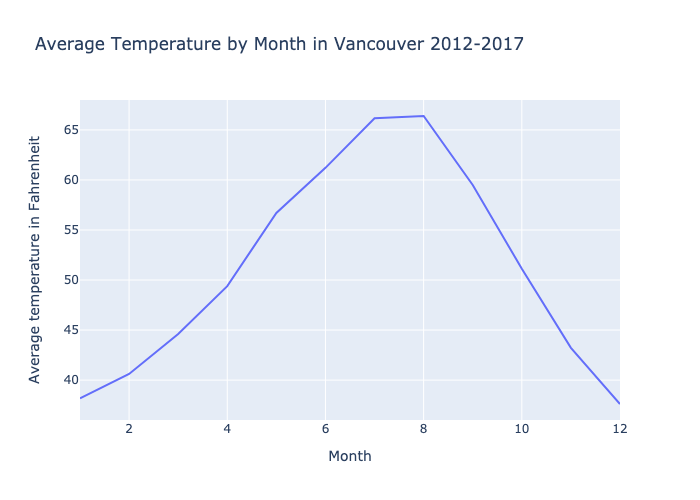

In [13]:
from plotly.io import write_image
import kaleido
# plot average temperature by month
fig = px.line(filled_df.groupby('Month').agg({'Vancouver':'mean'}).reset_index(), x='Month', y='Vancouver',
       labels={
                     "Month": "Month",
                     "Vancouver": "Average temperature in Fahrenheit",
                 },
                title="Average Temperature by Month in Vancouver 2012-2017")

#below code creates a static image
img_bytes = fig.to_image(format="png", engine="kaleido")
from IPython.display import Image
Image(img_bytes)

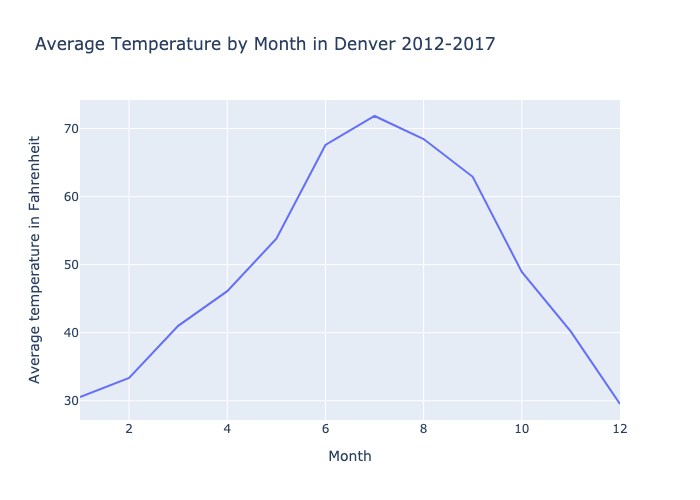

In [19]:
fig=px.line(filled_df.groupby('Month').agg({'Denver':'mean'}).reset_index(), x='Month', y='Denver',
       labels={
                     "Month": "Month",
                     "Denver": "Average temperature in Fahrenheit",
                 },
                title="Average Temperature by Month in Denver 2012-2017")
img2_bytes = fig.to_image(format="png", engine="kaleido")
from IPython.display import Image
Image(img2_bytes)

In [16]:
# create a date column
filled_df['Date'] = pd.DatetimeIndex(filled_df['datetime']).date

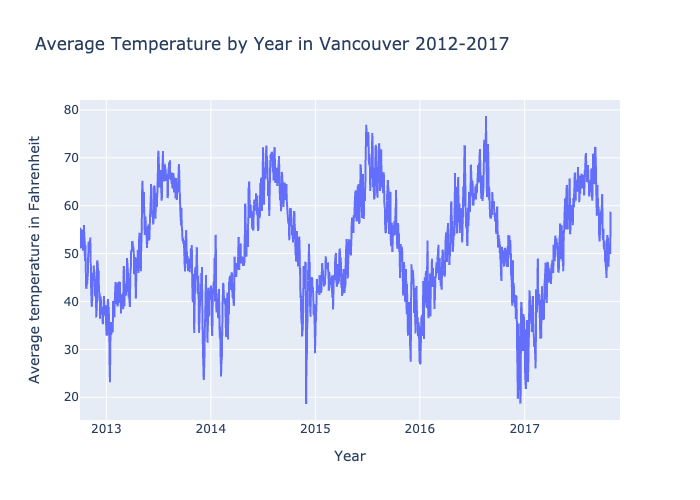

In [20]:
fig=px.line(filled_df.groupby('Date').agg({'Vancouver':'mean'}).reset_index(), x='Date', y='Vancouver',
             labels={
                     "Date": "Year",
                     "Vancouver": "Average temperature in Fahrenheit",
                 },
                title="Average Temperature by Year in Vancouver 2012-2017")
img3_bytes = fig.to_image(format="png", engine="kaleido")
from IPython.display import Image
Image(img3_bytes)

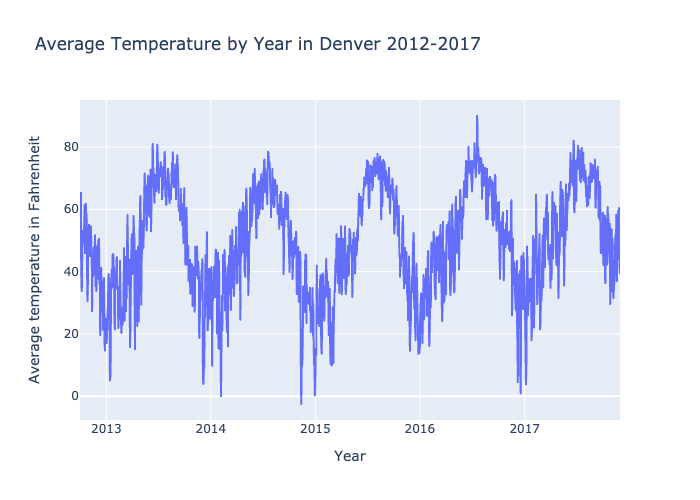

In [21]:
fig=px.line(filled_df.groupby('Date').agg({'Denver':'mean'}).reset_index(), x='Date', y='Denver',
             labels={
                     "Date": "Year",
                     "Denver": "Average temperature in Fahrenheit",
                 },
                title="Average Temperature by Year in Denver 2012-2017")
img4_bytes = fig.to_image(format="png", engine="kaleido")
from IPython.display import Image
Image(img4_bytes)